# **How Does Camera Filters (Meitu Beauty Cam) Affect Facial Recognition Results**

*By Francis Lin, Nicole Wang, Jenny Wang, and Min Jin on Apr 21th*


## **Background & Introduction**

Should people use their photoshopped pictures online? Should this be considered as a scam? As the usage of camera filter apps such as beauty cam becomes more prevalent with improving applications, whether people should use beauty filters becomes a hot topic in Asian countries. People use [Beauty Cam](https://www.meitu.com/en/) application to photoshop their selfies and post them on social media or online dating apps. It becomes intriguing to think if people can use their photoshopped pictures online and how much they are different from their photoshopped pictures. In this project, we study the impact of different facial effects of Beauty Cam on Amazon Rekognition by comparing the similarity scores of different photos. The incorporated features include sliming face, resizing eyes, adjusting forehead, and adjusting chin sizes features. We want to investigate which feature impacts the recognition accuracy the most.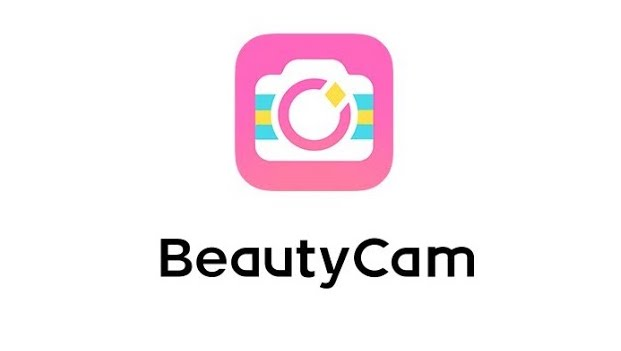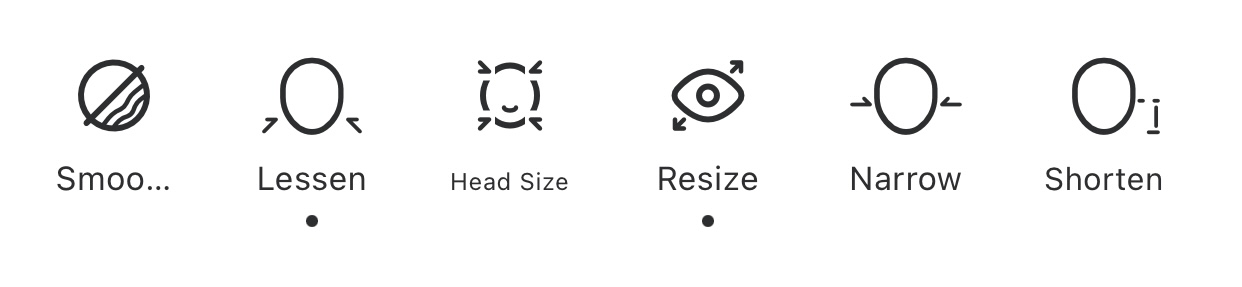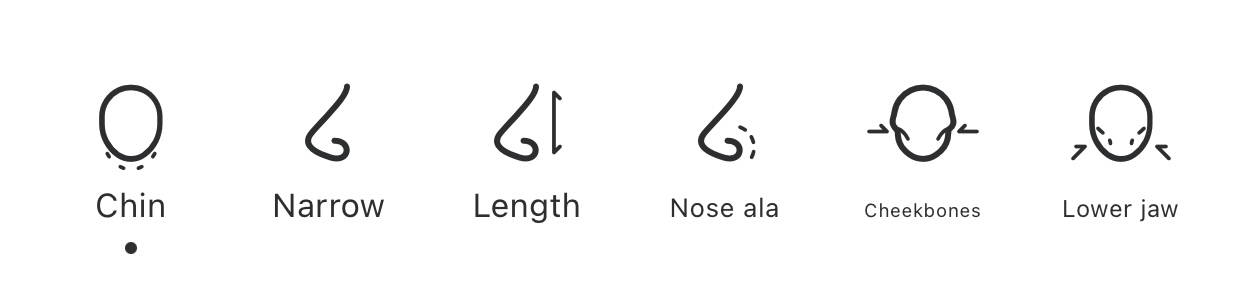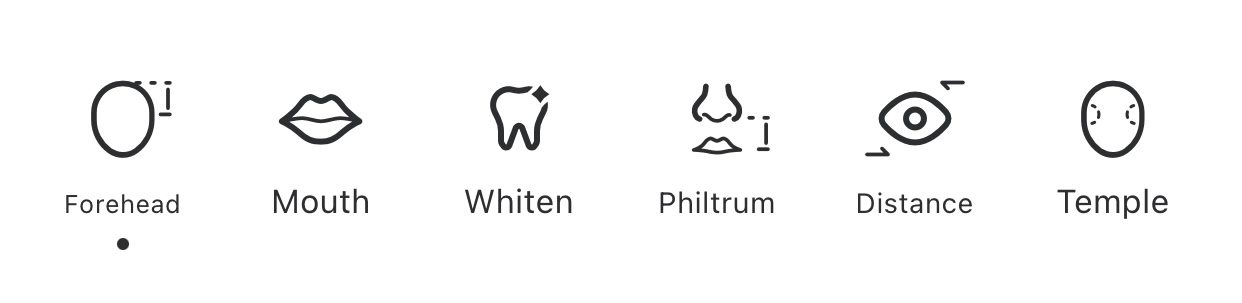

## **Amazon Rekognition Overview**

Amazon Rekognition is a deep learning-based visual analysis service that can detect objects and scenes unique to users’ customization. Users just provide pictures or videos to the Amazon Rekognition API that are stored in Amazon S3 to access the analysis service. The Rekognition includes services of object and scene detection, image moderation, facial analysis, celebrity recognition, face comparison, text in image, and Personal Protective Equipment detection. In this project, we use the face comparison feature to analyze images based on similarity scores. The request of this feature compares the target image with the source image, and the returned response includes values of similarity, confidence score, position values, brightness, sharpness, and so on.


## **Experimental Design**
Firstly, data will be collected by each member taking 11 photos of himself/herself (1 photo serves as a control variable that consists of zero beautifying effects; 10 photos that have different degree levels of beautifying effects). In this experiment, we will use multiple linear regression models to estimate the partial effects of the beauty cam. We chose four beautifying effects “forehead”, “chin”, “eyes”, and “cheek” as our variables. These are the most common effects people use in BeautyCam. Each member’s 10 photos will use all four effects with different levels. For example, for Nicole’s seventh photo, she used level 15 for “forehead” effect, level 3 for “chin” effect, level “98” for eyes and level “68” for cheek. Random levels of beauty effects are used because we want to have a well-distributed random sample. We also have a binary variable “sex” (1= male, 0=female), because we expect Amazon Rekognition to have different results depend on the genders. After conducting the regression, we will construct 95% confidence intervals of the estimated slope coefficients.

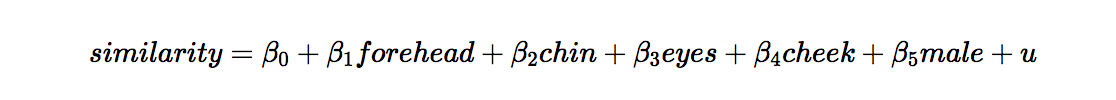

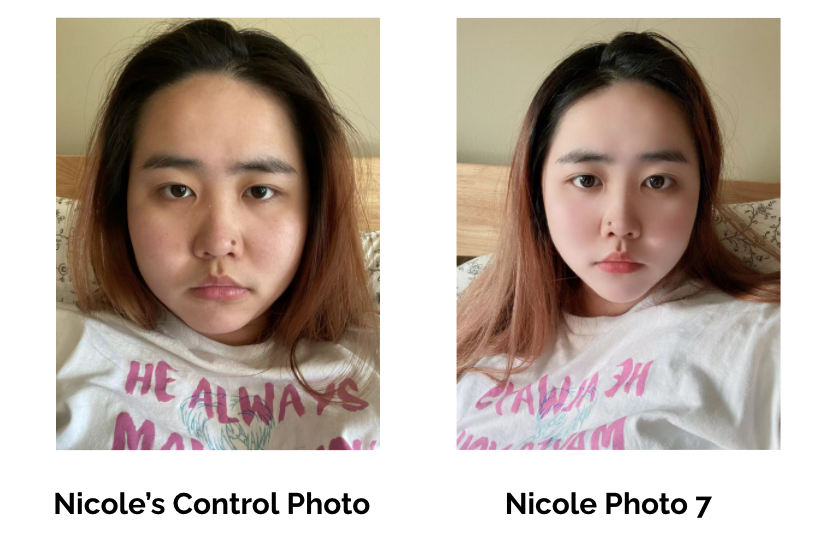

## **Amazon Rekognition Analysis: Data Overview**

In this project we focus on determining the effect of changing different facial features on the final accurracy score obtained from Amazon Rekognition when comparing the control (selfies taken using camera without any filter) and samples that use filters at various levels. 

Therefore, to obtain samples simulating to random sampling method, each of the four members of the group takes 10 selies and changes camera filter on the four facial components (forhead, chin, eyes, and cheek) at different levels for each picture. In each picture, the background, lighting environment, head position, and facial expressions are controlled to ensure minimum amount of confounding variables during the sampling. 

**Sampling data**:

In [ ]:
#@title **Data Form**
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('data sheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
data = pd.DataFrame.from_records(rows,columns=['name','pic','forehead','chin','eyes','cheek','male'])
data = data.drop(0)
#new_header = data.iloc[0] #grab the first row for the header
#data = data[1:] #take the data less the header row
#data.columns = new_header #set the header row as the df header

data['pic'].astype(int)
data['forehead'].astype(int)
data['chin'].astype(int)
data['eyes'].astype(int)
data['male'].astype(int)
data


The next part explains each variable in the study.

**Forehead**: Discrete variable. Alters the forehead size. The default value is zero, and larger positive values represent smaller forehead sizes while smaller negative values represent larger forehead sizes. Range: (-100, 100). 

**Chin**: Discrete variable. Alters the chin length. The default value is zero, and larger positive values represent longer chin lengths while smaller negative values represent shorter chin lengths. Range: (-100, 100).

**Eyes**: Discrete variable. Alters the eye size. The default value is zero, and larger positive values represent larger eyes sizes. Range: (0, 100).

**Cheek**: Discrete variable. Alters the cheek size. The default value is zero, and larger positive values represent narrower cheek size. Range: (0, 100)

**Sex**: Binary variable. 1 represents male and 0 represents female. 

There are total of 40 samples, half are males and the other half are females. From the data table we can see a well distributed sample as some observations take extreme values and others are distributed in the middle. 

Controlling these variables allow us to observe how well Amazon Rekognition works when some facial components of same subject are changed.

## **Amazon Rekognition Analysis: test results** 

The following table is generated after adding a new variable "similarity" to the original table. This variable is a continuous variable represents the score obtained from Amazon Rekognition after running each sample picture against the control picture. 


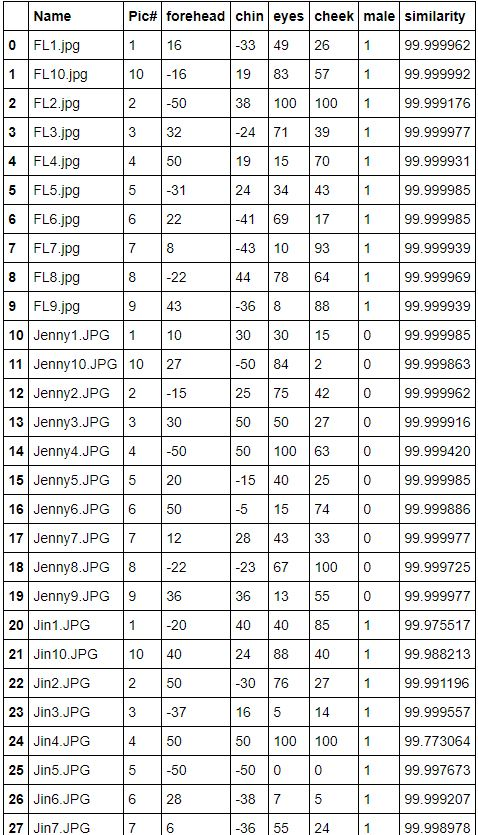

Using that we are able to construct the multi-variabe linear model:  $similarity =$ $\beta_0 + \beta_1forehead + \beta_2chin + \beta_3eyes + \beta_4cheek + \beta5male + u$

The following table shows the OLS regressio results

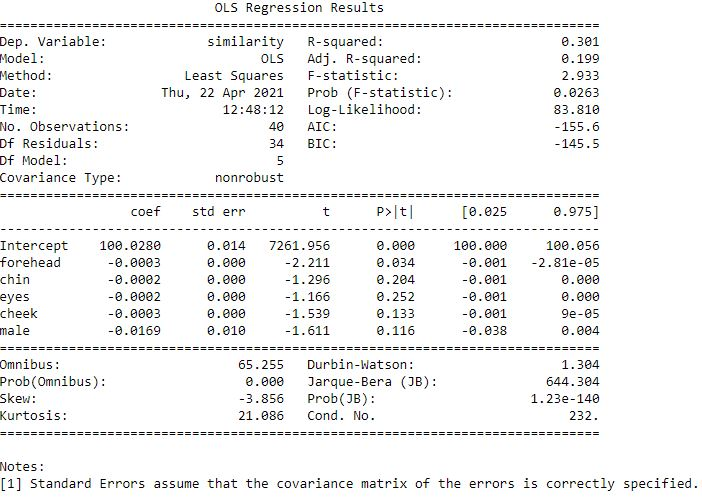

Printing out the regression summary gives us a lot of information. At first glance, all regressors have negative effects on similarity. This is in line with our expectations. However, among all the slope estimates, only forehead obtains statistical significance at the 5% significance level, with a p-value of 0.034. The 95% confidence intervals are presented next to the p-values. The only 95% confidence interval to not include the null is forehead. While the other 4 variables do not obtain statistical significance, the F-statistic informs us that all regressors do have an effect on similarity jointly. The F-test rejects the null hypothesis at 5% significance level. Finally, these regressors do not explain well the similarity because the adjusted R-squared is only 20%.

Interestingly, while holding other factors fixed, the difference in similarity between male and female is -0.0169, although this regressor does not obtain statistical significance.

To sum up, we only find that beautifying effect on the forehead has a statically significant effect on similarity. For 1 unit increase in the beautifying effect on forehead, the similarity index decreases by 0.0003.

## **Visualization**

Let's examine the correlation between each variable in the data

#### Correlation Graph

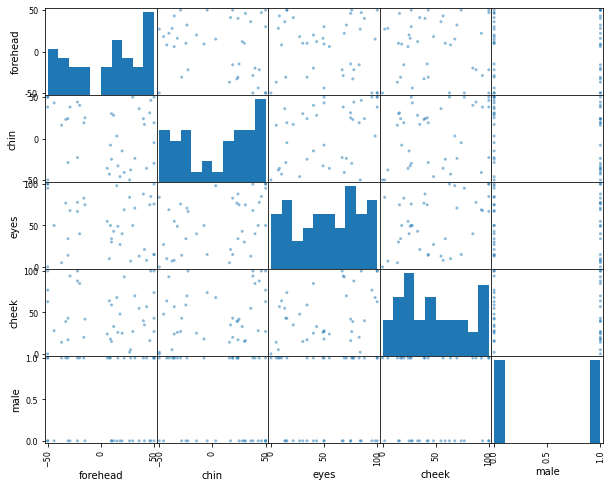

From the multiple correlation graph we see that there's no specific pattern exist among each variable. 

#### Residual Plot


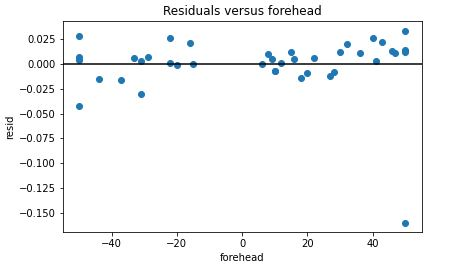

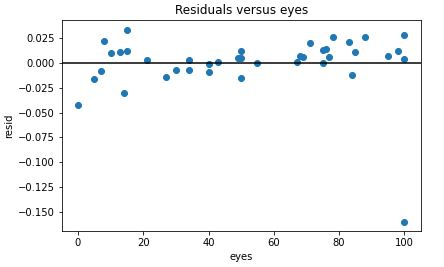

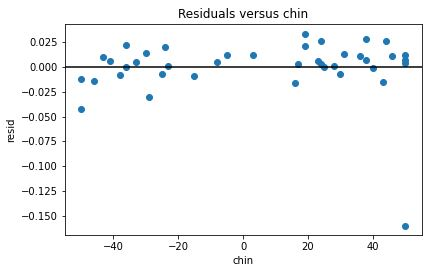

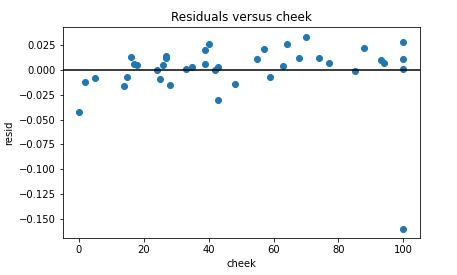

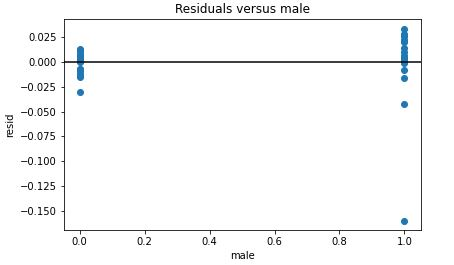

From the residual graphs we can see that all points in every graph, except for male, are randomly distributed along the residual line. This means that the multiple regression model is appropriate for our data. The graph of male can be explained by its nature of binary variable. 

## **Deploying Amazon Rekognition Architecture**

This project gathers data through our four members by taking selfies using BeautyCam. The data is recorded using Google Sheet, which was converted to a csv file and then uploaded to AWS S3 bucket. In this process, AWS IAM is used to grant permission for AWS Rekognition,which is used to perform analysis on the sample, accessing data from the S3 bucket. IAM is also used when granting Sagemaker access to data in AWS Rekognition and store the new data back to the bucket. After that, python is used to perform data analysis.  

![diagram](https://github.com/Francis-L1/QTM350-Marinana-Final-Project/blob/main/Amazon%20Rekognition.png?raw=true)

## **Conclusion**
In this project, we studied the impacts of different facial effects of Beauty Cam on Amazon Rekognition by comparing the similarity scores of different photos. The incorporated features include sliming face, resizing eyes, adjusting forehead, and adjusting chin sizes features.

According to our analysis, we found that only "forehead" effect obtains statistical significance at the 5% significance level, with a p-value of 0.034. While the other 4 variables (chin, eyes, cheek, and genders) do not obtain statistical significance, the F-statistic informs us that all regressors do have an effect on similarity jointly.

Although photos taken by the Beauty Cam seem very different from the control photos, Amazon Rekognition is advanced enough to recognize the similarities. As a result, photos taken by Beauty Cam can be used on platforms that have advanced recognition services as Amazon Rekognition. However, for online dating apps or social medias, people should be cautious before posting filtered photos because as humans, we don't have as developed services as Amazon Rekognition to distinguish a person from his/her filtered photos. People may believe that using apps like Beauty Cam boost their confidence, but everyone looks beautiful in his/her own way and it is unnecessary to feel insecure about the way you look
In this project, we studied the impacts of different facial effects of Beauty Cam on Amazon Rekognition by comparing the similarity scores of different photos. The incorporated features include sliming face, resizing eyes, adjusting forehead, and adjusting chin sizes features.
